In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

# 🍀**Dataset 1: Leaf Classification**

In [39]:
df = pd.read_csv('leaves_training_final.csv')
df.head(10)

,name,length,width,texture,edge,arrangement,shape
0,seetha,6.0,2.5,smooth,straight,alternate,elliptic
1,seetha,6.0,2.6,smooth,straight,alternate,elliptic
2,seetha,5.3,2.4,smooth,straight,alternate,elliptic
3,seetha,5.2,2.3,smooth,straight,alternate,elliptic
4,seetha,3.7,2.0,smooth,straight,alternate,elliptic
5,seetha,4.9,1.9,smooth,straight,alternate,elliptic
6,seetha,5.8,2.1,smooth,straight,alternate,elliptic
7,seetha,6.7,2.8,smooth,straight,alternate,elliptic
8,seetha,3.8,1.8,smooth,straight,alternate,elliptic
9,seetha,4.5,2.1,smooth,straight,alternate,elliptic


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         400 non-null    object 
 1   length       400 non-null    float64
 2   width        400 non-null    float64
 3   texture      400 non-null    object 
 4   edge         400 non-null    object 
 5   arrangement  400 non-null    object 
 6   shape        400 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.0+ KB


In [41]:
df.describe()

,length,width
count,400.000000,400.000000
mean,7.963750,4.100000
std,6.070861,5.274866
min,1.600000,0.300000
25%,3.900000,1.900000
50%,6.050000,2.400000
75%,8.325000,3.700000
max,33.500000,32.000000


In [42]:
df.describe(include='all')

,name,length,width,texture,edge,arrangement,shape
count,400,400.000000,400.000000,400,400,400,400
unique,20,NaN,NaN,8,4,3,5
top,seetha,NaN,NaN,smooth,jagged,alternate,ovate
freq,20,NaN,NaN,220,140,280,140
mean,NaN,7.963750,4.100000,NaN,NaN,NaN,NaN
std,NaN,6.070861,5.274866,NaN,NaN,NaN,NaN
min,NaN,1.600000,0.300000,NaN,NaN,NaN,NaN
25%,NaN,3.900000,1.900000,NaN,NaN,NaN,NaN
50%,NaN,6.050000,2.400000,NaN,NaN,NaN,NaN
75%,NaN,8.325000,3.700000,NaN,NaN,NaN,NaN


## ❓**Question 1 :** Are the properties of leaves (like length, width) consistent across leaf types?

In [43]:
print("Plant Species :")
df['name'].unique()

Plant Species :


array(['seetha', 'kaju', 'elachi', 'mouha', 'lemon', 'Aswaganda', 'Neem',
       'long', 'conder', 'sidha payam', 'pathar chatta', 'Tej',
       'Neelamari (mitali)', 'Sravanthi', 'Anjeer', 'tulsi', 'ajvine',
       'jade plant', 'muleti', 'sarso'], dtype=object)

In [44]:
# Mean of length and width within each type
df.groupby("name")[["length", "width"]].mean()

,length,width
name,,
Anjeer,25.615,24.420
Aswaganda,4.630,2.875
Neelamari (mitali),4.620,1.670
Neem,5.935,1.500
Sravanthi,4.135,3.105
Tej,8.140,3.595
ajvine,3.570,1.755
conder,3.490,1.575
elachi,16.100,3.755


In [45]:
# Standard deviation for length and width within each type
df.groupby("name")[["length", "width"]].std()

,length,width
name,,
Anjeer,4.043744,3.730331
Aswaganda,1.363471,0.839721
Neelamari (mitali),1.023204,0.343511
Neem,1.873155,0.612158
Sravanthi,0.746412,0.772198
Tej,1.458334,0.654117
ajvine,0.220287,0.153811
conder,0.513912,0.305864
elachi,2.178604,1.285742


In [46]:
# Count unique values for each categorical property
df.groupby("name")[["texture", "edge", "arrangement", "shape"]].nunique()

,texture,edge,arrangement,shape
name,,,,
Anjeer,1,1,1,1
Aswaganda,1,1,1,1
Neelamari (mitali),1,1,1,1
Neem,1,1,1,1
Sravanthi,1,1,1,1
Tej,1,1,1,1
ajvine,1,1,1,1
conder,1,1,1,1
elachi,1,1,1,1


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[numeric_cols])

# Create a new DataFrame with normalized data
df_normalized = df.copy()
df_normalized[numeric_cols] = normalized_data

df_normalized.head()

,name,length,width,texture,edge,arrangement,shape
0,seetha,0.137931,0.069401,smooth,straight,alternate,elliptic
1,seetha,0.137931,0.072555,smooth,straight,alternate,elliptic
2,seetha,0.115987,0.066246,smooth,straight,alternate,elliptic
3,seetha,0.112853,0.063091,smooth,straight,alternate,elliptic
4,seetha,0.065831,0.053628,smooth,straight,alternate,elliptic


In [49]:
df_normalized.groupby('name')[["length", "width"]].mean()

,length,width
name,,
Anjeer,0.752821,0.760883
Aswaganda,0.094984,0.081230
Neelamari (mitali),0.094671,0.043218
Neem,0.135893,0.037855
Sravanthi,0.079467,0.088486
Tej,0.205016,0.103943
ajvine,0.061755,0.045899
conder,0.059248,0.040221
elachi,0.454545,0.108991


<Figure size 1400x600 with 0 Axes>

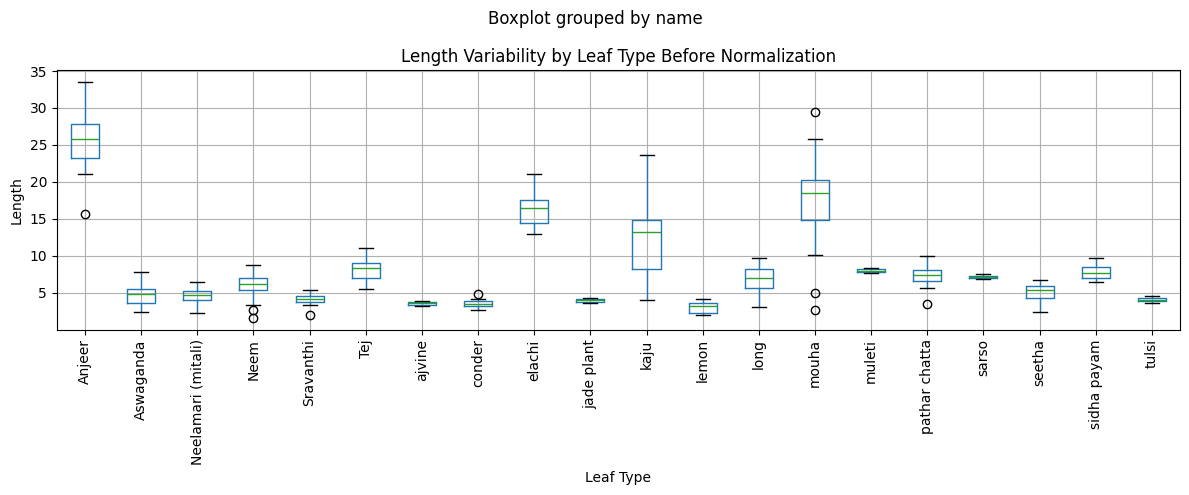

In [50]:
plt.figure(figsize=(14, 6))
df.boxplot(column="length", by="name", rot=90, figsize=(12, 5))
plt.title("Length Variability by Leaf Type Before Normalization")
plt.xlabel("Leaf Type")
plt.ylabel("Length")
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

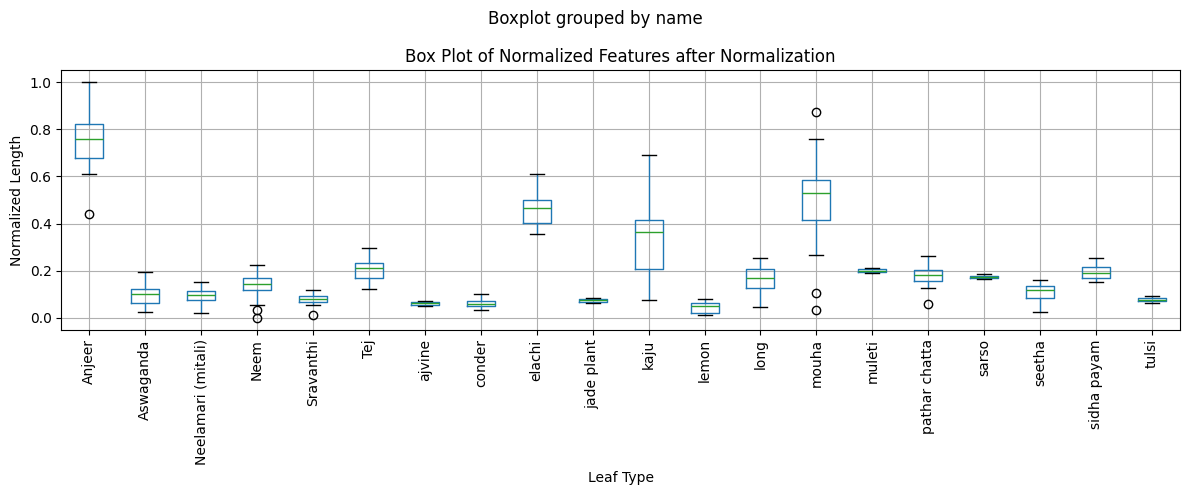

In [51]:
plt.figure(figsize=(14, 6))
df_normalized.boxplot(column="length", by="name", rot=90, figsize=(12, 5))
plt.title("Box Plot of Normalized Features after Normalization")
plt.xlabel("Leaf Type")
plt.ylabel("Normalized Length")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

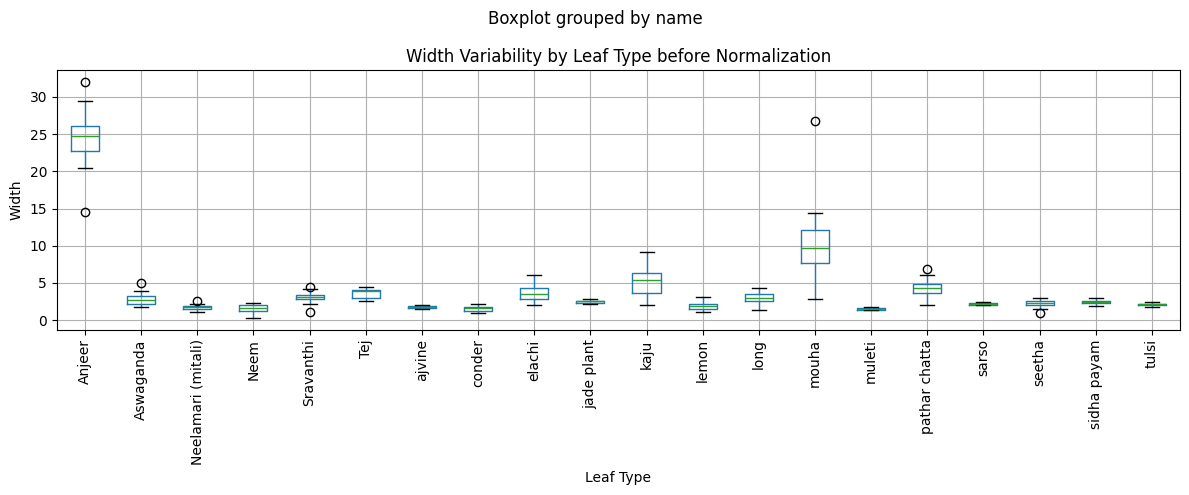

In [52]:
df.boxplot(column="width", by="name", rot=90, figsize=(12, 5))
plt.title("Width Variability by Leaf Type before Normalization")
plt.xlabel("Leaf Type")
plt.ylabel("Width")
plt.tight_layout()
plt.show()

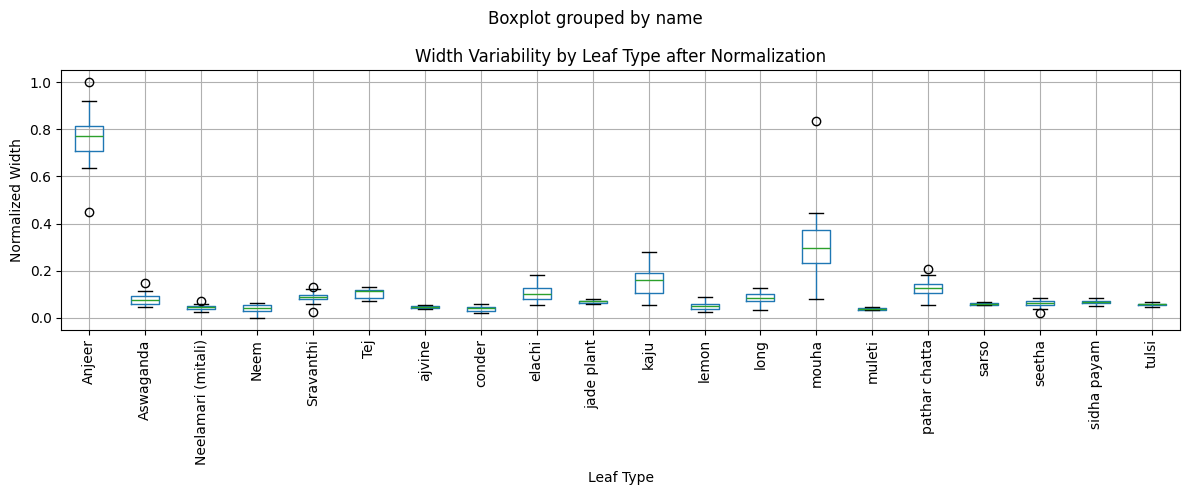

In [53]:
df_normalized.boxplot(column="width", by="name", rot=90, figsize=(12, 5))
plt.title("Width Variability by Leaf Type after Normalization")
plt.xlabel("Leaf Type")
plt.ylabel("Normalized Width")
plt.tight_layout()
plt.show()

## ❓**Question 2 :** How many examples do we have for each plant species?

In [54]:
print("The no. of samples of each plant type are as follows : ")
df['name'].value_counts()

The no. of samples of each plant type are as follows : 


name
seetha                20
kaju                  20
muleti                20
jade plant            20
ajvine                20
tulsi                 20
Anjeer                20
Sravanthi             20
Neelamari (mitali)    20
Tej                   20
pathar chatta         20
sidha payam           20
conder                20
long                  20
Neem                  20
Aswaganda             20
lemon                 20
mouha                 20
elachi                20
sarso                 20
Name: count, dtype: int64

##❓**Question 3 :** Given the length of  leaf & its species, predict width using regression modeling.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
X = df[["length", "name"]]   # Input features
y = df["width"]              # Target variable

In [57]:
# Preprocess categorical feature (name)
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), ["name"])
], remainder="passthrough")

# # Create pipeline (preprocessing + linear regression)
pipeline = make_pipeline(preprocessor, LinearRegression())

In [58]:
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipeline.predict(X_test)

In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse,5))
print("R² Score:", round(r2,5))

Mean Squared Error (MSE): 0.77283
R² Score: 0.96312


In [61]:
name = input("Enter the name of the plant: ")
length = float(input("Enter the length of the plant: "))

# Create new DataFrame
input_df = pd.DataFrame({'length': [length], 'name': [name]})

# Predict using the pipeline
predicted_width = pipeline.predict(input_df)
print("Predicted width of the plant:", round(predicted_width[0], 2))


Predicted width of the plant: 5.59


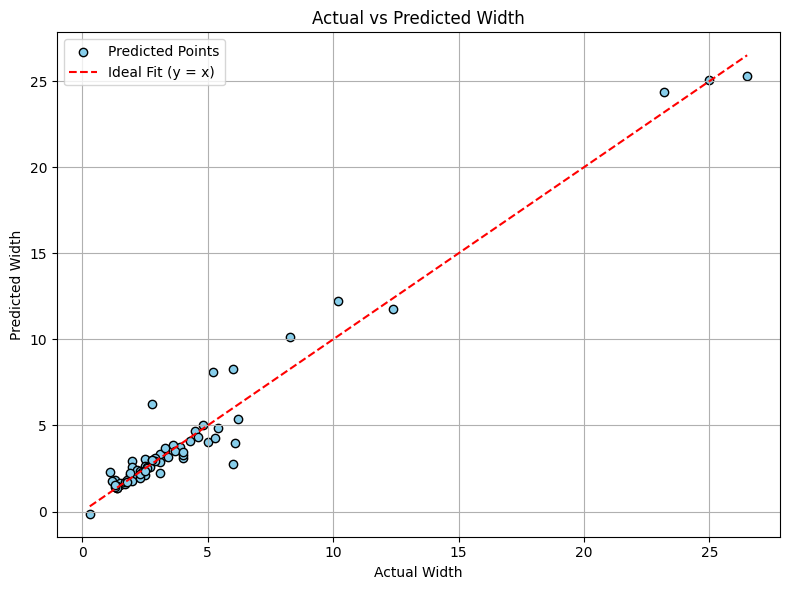

In [62]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='skyblue', edgecolor='k', label='Predicted Points')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit (y = x)')

plt.xlabel("Actual Width")
plt.ylabel("Predicted Width")
plt.title("Actual vs Predicted Width")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


# 📊**Dataset 2: Survey Dataset**

In [63]:
data = pd.read_csv('DAVWorkshop_Survey.csv')
data.head(10)

,Timestamp,Name of your College,Age in years (please enter only a number/integer),Which district is your hometown located in?,PINCODE of your home address,Approx. Distance of your home from IIT Bhilai (in Kms). Enter only a number (floating point).,Approx. Time to reach IIT Bhilai from your hometown (in hours). Enter only a number (floating point),Did you appear in JEE?,"How comfortable are you with math of data science fundamentals: Linear algebra, Optimization, Statistics, Probability?",How comfortable are you with coding in Python?,What is your career goal?,What do you expect to learn from this workshop?,"What applications of data science are you most interested in? Give examples from your daily life, or things that impact you most...or where you can make an impact."
0,07-12-2025 16:22,Krishna Engineering College khamariya,2005,Durg,490006,10kms,30 min,Appeared but didn't Qualify,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Become a software developer,To learn new things or technology,NaN
1,07-12-2025 16:23,Rungta college of engineering and technology,21,Saran,841410,1200km,32 hours,Appeared but didn't Qualify,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Data analyst,I expected to gain a deeper understanding of c...,Finance sector or education
2,07-12-2025 16:27,"Rungta College of Engineering and Technology, ...",20,Ranchi,834005,604,13,Qualified JEE Mains,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 proje...",My career goal is to become a skilled data sci...,I expect to gain hands-on experience in data w...,I?m interested in applying data science to hea...
3,07-12-2025 16:29,Krishna engineering college bhilai,22,Kanker,494337,3,0.15,Never appeared in JEE,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Become a Ml or data engineer,Learn about data science,Power bi
4,07-12-2025 16:29,Krishna Engineering College,22,Durg,490023,5.1 kms,30 mins,Never appeared in JEE,Beginner: can't understand how to model data w...,"Intermediate: Some familiarity, made 1-2 projects",To Become a Data Scientist,I expect to gain practical insights into data ...,1.) Natural Language processing 2) Personalize...
5,07-12-2025 16:35,University Teaching Department (Csvtu),20,Durg,490026,12,0.5 hours,Appeared but didn't Qualify,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Data analyst,To have an in-depth knowledge of how mathemati...,Tax evasion and incarceration rates
6,07-12-2025 16:35,Rungta college of engineering and technology,21,Kamrup(M),781034,1800,72,Appeared but didn't Qualify,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",To be a data scientist,I'm expecting to learn more about python progr...,I?m most interested in data science applicatio...
7,07-12-2025 16:37,Krishna Engineering College Bhilai,24 year old in 2025,Durg,491001,5 km,15 minutes,Never appeared in JEE,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",AI scientist & Enterpreneur,Basic of Data science,"In AI , Amazon (E-commerce)"
8,07-12-2025 16:39,CSVTU,20,Kushinagar,274304,1000,24,Qualified JEE Mains,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",To get a decent job,AI,In field of AI
9,07-12-2025 16:39,U.T.D. C.S.V.T.U,20,Raipur,492001,10,0.45,Appeared but didn't Qualify,Maths itself is not my thing. I prefer visual ...,"Proficient: Used numpy, pandas, sklearn and ma...",Being part of AI revolution.,To refine my skills and add new edge.\n\n,How exploring and exploitation of data can ope...


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 13 columns):
 #   Column                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                               --------------  ----- 
 0   Timestamp                                                                                                                                                            165 non-null    object
 1   Name of your College                                                                                                                                                 164 non-null    object
 2   Age in years (please enter only a number/integer)                                                                     

In [65]:
data.describe()

,Timestamp,Name of your College,Age in years (please enter only a number/integer),Which district is your hometown located in?,PINCODE of your home address,Approx. Distance of your home from IIT Bhilai (in Kms). Enter only a number (floating point).,Approx. Time to reach IIT Bhilai from your hometown (in hours). Enter only a number (floating point),Did you appear in JEE?,"How comfortable are you with math of data science fundamentals: Linear algebra, Optimization, Statistics, Probability?",How comfortable are you with coding in Python?,What is your career goal?,What do you expect to learn from this workshop?,"What applications of data science are you most interested in? Give examples from your daily life, or things that impact you most...or where you can make an impact."
count,165,164,164,163,161,154,147,157,165,165,165,146,126
unique,150,126,11,72,80,108,90,4,4,9,136,143,123
top,07-12-2025 16:57,Rungta college of engineering and technology,20,Durg,490006,10,0.5,Appeared but didn't Qualify,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Data scientist,Experience,I?m interested in using data science for publi...
freq,3,13,73,50,20,10,14,76,102,99,7,2,2


## ❓**Question 1 :** Perform Data Cleaning

In [66]:
data_clean = data.copy()   #Copy of the original DataFrame

In [67]:
print(f"Number of fully duplicate rows: {data_clean.duplicated().sum()}\n")

Number of fully duplicate rows: 0



In [68]:
data_clean.isna().sum()

Timestamp                                                                                                                                                               0
Name of your College                                                                                                                                                    1
Age in years (please enter only a number/integer)                                                                                                                       1
Which district is your hometown located in?                                                                                                                             2
PINCODE of your home address                                                                                                                                            4
Approx. Distance of your home from IIT Bhilai (in Kms). Enter only a number (floating point).                                                         

In [69]:
# Convert date columns or numeric fields stored as object
for col in (data_clean.columns):
    if (data_clean[col].dtype == 'object'):
        try:
            data_clean[col] = pd.to_numeric(df[col])
        except:
            pass  # keep as object if not convertible


# Identify numeric and categorical columns
num_cols = data_clean.select_dtypes(include=[np.number]).columns
cat_cols = data_clean.select_dtypes(exclude=[np.number]).columns

# Impute numeric columns with 'mean'
for col in num_cols:
    mean_val = data_clean[col].mean()
    data_clean[col].fillna(mean_val, inplace=True)

# Impute categorical columns with 'mode'
for col in cat_cols:
    mode_val = data_clean[col].mode()[0]
    data_clean[col].fillna(mode_val, inplace=True)

print("👉 Cleaned Data Overview:\n\n")
print(data_clean.info())


👉 Cleaned Data Overview:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 13 columns):
 #   Column                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                               --------------  ----- 
 0   Timestamp                                                                                                                                                            165 non-null    object
 1   Name of your College                                                                                                                                                 165 non-null    object
 2   Age in years (please enter only a number/integer)                                          

In [70]:
print("👉 Any remaining missing values?\n\n", data_clean.isnull().sum())


👉 Any remaining missing values?

 Timestamp                                                                                                                                                              0
Name of your College                                                                                                                                                   0
Age in years (please enter only a number/integer)                                                                                                                      0
Which district is your hometown located in?                                                                                                                            0
PINCODE of your home address                                                                                                                                           0
Approx. Distance of your home from IIT Bhilai (in Kms). Enter only a number (floating point).                            

## ❓**Question 2 :** Detect and treat outliers

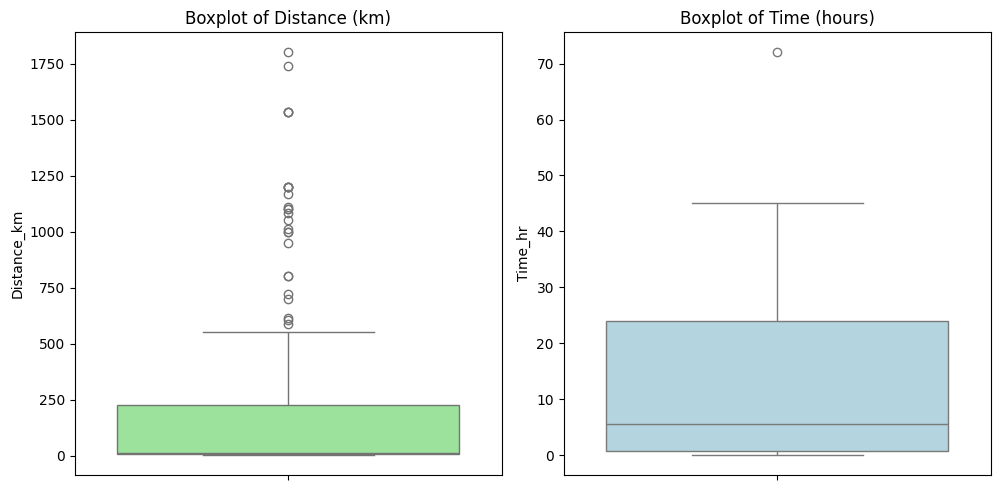

In [71]:
# Clean and convert Distance column
data['Distance_km'] = data['Approx. Distance of your home from IIT Bhilai (in Kms). Enter only a number (floating point).'] \
                    .str.extract(r'([\d.]+)')[0].astype(float)

# Clean and convert Time column
time_col = 'Approx. Time to reach IIT Bhilai from your hometown (in hours). Enter only a number (floating point) '
data['Time_hr'] = data[time_col].str.extract(r'([\d.]+)')[0].astype(float)

plt.figure(figsize=(15, 5))

# Distance Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Distance_km'], color='lightgreen')
plt.title('Boxplot of Distance (km)')

# Time Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=data['Time_hr'], color='lightblue')
plt.title('Boxplot of Time (hours)')

plt.tight_layout()
plt.show()


In [72]:
# IQR Method :-

def detect_outliers_iqr(DF, column):
    Q1 = DF[column].quantile(0.25)
    Q3 = DF[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = DF[(DF[column] < lower_bound) | (DF[column] > upper_bound)]
    return outliers

# Detecting outliers
iqr_outliers_distance = detect_outliers_iqr(data, 'Distance_km')
iqr_outliers_time = detect_outliers_iqr(data, 'Time_hr')

print("👉 Outliers (IQR) - Distance:\n", iqr_outliers_distance[['Distance_km']])
print("\n\n👉 Outliers (IQR) - Time:\n", iqr_outliers_time[['Time_hr']])


👉 Outliers (IQR) - Distance:
      Distance_km
1         1200.0
2          604.0
6         1800.0
8         1000.0
16        1200.0
19         720.0
21        1000.0
23        1535.0
25        1535.0
35         700.0
37        1109.0
40        1535.0
44         950.0
45        1100.0
52        1200.0
55        1200.0
58        1010.0
78         616.0
81        1100.0
83         587.0
86        1170.0
87         800.0
88        1081.0
94         800.0
97        1050.0
117       1740.0


👉 Outliers (IQR) - Time:
    Time_hr
6     72.0


## ❓**Question 3 :** Build a regression model to predict distance from time

Mean Squared Error (MSE): 152606.71482237944
R² Score: -0.062285263603973906




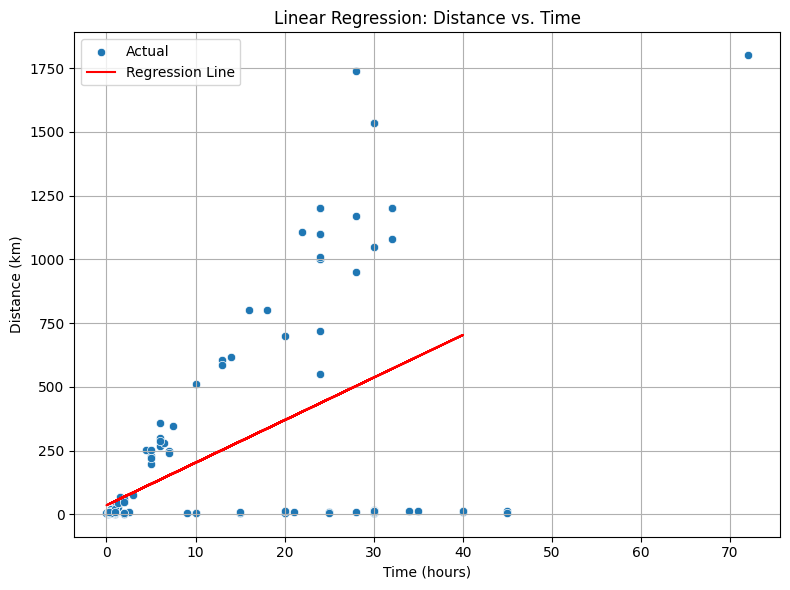

In [73]:
# Linear Regression :-

df_model = data[['Distance_km', 'Time_hr']].dropna()  # Drop missing values

X = df_model[['Time_hr']]    # Input Variable
y = df_model['Distance_km']  # Target Variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("\n")

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time_hr', y='Distance_km', data=df_model, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("Time (hours)")
plt.ylabel("Distance (km)")
plt.title("Linear Regression: Distance vs. Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
time = float(input("Enter time taken (in hours): "))

# Create a new DataFrame
input_df = pd.DataFrame({'Time_hr': [time]})

predicted_distance = model.predict(input_df)

print("Predicted distance from IIT Bhilai:", round(predicted_distance[0], 2), "km")


Predicted distance from IIT Bhilai: 52.69 km


# 📃**Text Dataset (NLP Tasks) :-**

In [75]:
new = pd.read_csv('DAVWorkshop_Survey.csv')
new.head(5)

,Timestamp,Name of your College,Age in years (please enter only a number/integer),Which district is your hometown located in?,PINCODE of your home address,Approx. Distance of your home from IIT Bhilai (in Kms). Enter only a number (floating point).,Approx. Time to reach IIT Bhilai from your hometown (in hours). Enter only a number (floating point),Did you appear in JEE?,"How comfortable are you with math of data science fundamentals: Linear algebra, Optimization, Statistics, Probability?",How comfortable are you with coding in Python?,What is your career goal?,What do you expect to learn from this workshop?,"What applications of data science are you most interested in? Give examples from your daily life, or things that impact you most...or where you can make an impact."
0,07-12-2025 16:22,Krishna Engineering College khamariya,2005,Durg,490006,10kms,30 min,Appeared but didn't Qualify,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Become a software developer,To learn new things or technology,NaN
1,07-12-2025 16:23,Rungta college of engineering and technology,21,Saran,841410,1200km,32 hours,Appeared but didn't Qualify,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Data analyst,I expected to gain a deeper understanding of c...,Finance sector or education
2,07-12-2025 16:27,"Rungta College of Engineering and Technology, ...",20,Ranchi,834005,604,13,Qualified JEE Mains,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 proje...",My career goal is to become a skilled data sci...,I expect to gain hands-on experience in data w...,I?m interested in applying data science to hea...
3,07-12-2025 16:29,Krishna engineering college bhilai,22,Kanker,494337,3,0.15,Never appeared in JEE,"Intermediate: can model some problems, solve s...","Intermediate: Some familiarity, made 1-2 projects",Become a Ml or data engineer,Learn about data science,Power bi
4,07-12-2025 16:29,Krishna Engineering College,22,Durg,490023,5.1 kms,30 mins,Never appeared in JEE,Beginner: can't understand how to model data w...,"Intermediate: Some familiarity, made 1-2 projects",To Become a Data Scientist,I expect to gain practical insights into data ...,1.) Natural Language processing 2) Personalize...


## ❓**Question 1 :** Cluster similar text data into groups

In [78]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords

# Drop missing values
colleges = new["Name of your College "].dropna().astype(str)

# Preprocess text
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
cleaned = colleges.str.lower().str.replace(r"[^a-z\s]", "", regex=True)
cleaned = cleaned.apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned)

# Find optimal number of clusters using silhouette score
scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Use best k
optimal_k = K[scores.index(max(scores))]
print("Optimal number of clusters:", optimal_k)

# Final clustering
final_model = KMeans(n_clusters=optimal_k, random_state=42)
labels = final_model.fit_predict(X)

# Assign cluster labels
df_result = pd.DataFrame({"College": colleges, "Cluster": labels})

# View grouped results
for i in range(optimal_k):
    print(f"\n✅ Cluster {i}:", df_result[df_result["Cluster"] == i]["College"].tolist())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Optimal number of clusters: 9

✅ Cluster 0: ['University Teaching Department (Csvtu)', 'CSVTU', 'U.T.D. C.S.V.T.U', 'CSVTU', 'Csvtu Bhilai ', 'UTD CSVTU', 'UTD - CSVTU', 'UTD CSVTU ', 'UTD, CSVTU', 'University Teaching Department, CSVTU', 'University Teaching Department, CSVTU ', 'UTD, CSVTU', 'UTD, CSVTU Bhilai ', 'University teaching department, CSVTU Bhilai C.G.', 'CSVTU']

✅ Cluster 1: ['Rungta college of engineering and technology ', 'Rungta College of Engineering and Technology, Bhilai ', 'Rungta college of engineering and technology ', 'Rungta College OF engineering and technology ', 'Rungta College of Engineering and Technology Bhilai(R1) ', 'Rungta college of engineering and technology', 'Rungta College of engineering and technology ', 'Rungta college engineering and technology ', 'Rungta College of engineering and technology ', 'Rungta College of engineering & Technology ', 'Rungta college of engineering and technology bhilai Durg chhattisgarh ', 'Rungta College Of engineerin

## ❓**Question 2 :** Generate extractive summaries of long texts

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# Load English spaCy model
nlp = spacy.load("en_core_web_sm")

# Load your data column (drop missing)
text_data = new["What is your career goal?"].dropna().astype(str)

# Treat each row as a separate sentence
sentences = [entry.strip() for entry in text_data if len(entry.strip()) > 10]

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

# Score each sentence
sentence_scores = X.sum(axis=1).A1

# Top-N sentences
top_n = 5
top_indices = np.argsort(sentence_scores)[-top_n:][::-1]
summary = [sentences[i] for i in sorted(top_indices)]

# Display result
print("\n📝 Extractive Summary:\n")
for i, sent in enumerate(summary, 1):
    print(f"{i}. { sent}")



📝 Extractive Summary:

1. My career goal is to become a skilled Web Developer with strong frontend and backend skills.I believe that learning data science will help me understand how to work with data efficiently in web-based platforms, making my applications more intelligent and data-driven.
2. My career goal is to become a skilled software developer and AI/ML engineer. I am passionate about solving real-world problems using technology, and I aim to work on impactful projects in fields like healthcare, education, and automation.
3. While I don't have a solidified idea of what my career will look like yet, I'm interested in working in a product based company that deliver tangible solutions to real life problems. I've been actively pursuing SDE, and QA roles in campus recruitment drives.
4. My career goal is to become a skilled professional who bridges the gap between data engineering and cloud infrastructure. I'm really interested in how data is collected, processed, and used to make 

## ❓**Question 3 :** Classify text using keyword frequency (TF-IDF or CountVectorizer)


📌 Sample Label Grouping:

+------------------------------------------------------------------------+--------------------+
| Original Label (Example)                                               | Grouped Category   |
+========================================================================+====================+
| fraud detection                                                        | Other              |
+------------------------------------------------------------------------+--------------------+
| I?m interested in using data science to support entrepreneurship. It   | Other              |
| can help find business opportunities, understand customers better.     |                    |
+------------------------------------------------------------------------+--------------------+
| like ,work to real life data and analysis, modeling, forecasting and   | Other              |
| all                                                                    |                    |
+------------

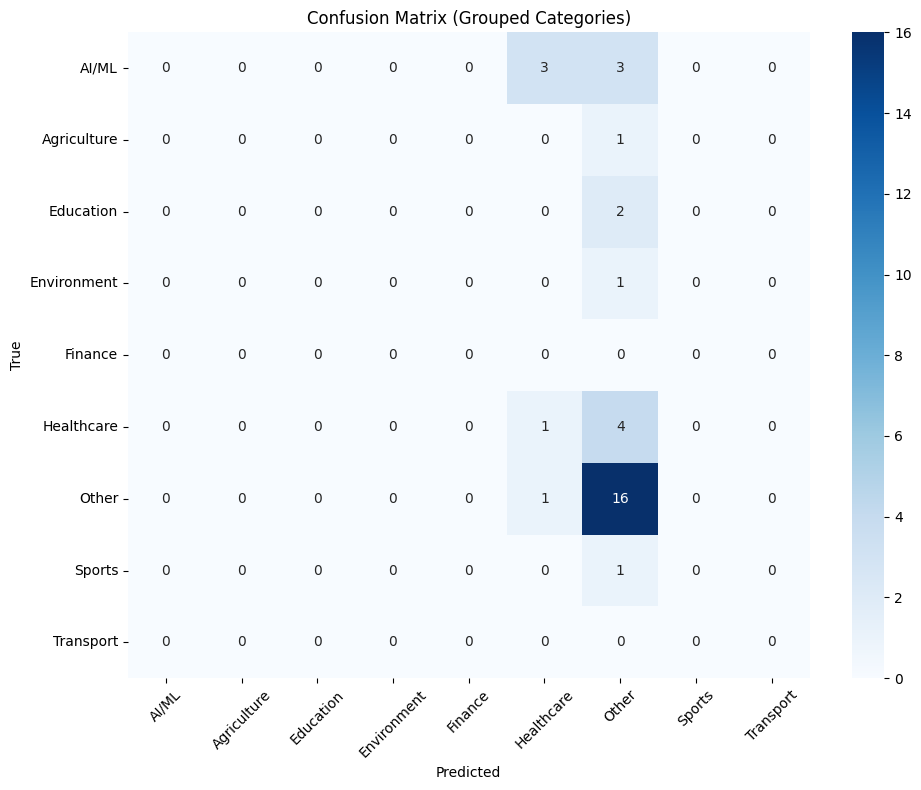

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
import textwrap

# 1. Load relevant columns & drop missing
X_raw = new["What is your career goal?"].astype(str)
y_raw = new["What applications of data science are you most interested in? Give examples from your daily life, or things that impact you most...or where you can make an impact."].astype(str)

df = pd.DataFrame({"career_goal": X_raw, "label": y_raw}).dropna()

# 2. Group labels into categories
def categorize_label(text):
    text = text.lower()
    if "health" in text:
        return "Healthcare"
    elif "education" in text or "school" in text:
        return "Education"
    elif "finance" in text or "bank" in text or "market" in text:
        return "Finance"
    elif "climate" in text or "environment" in text or "sustain" in text:
        return "Environment"
    elif "agriculture" in text or "farm" in text:
        return "Agriculture"
    elif "transport" in text:
        return "Transport"
    elif "sports" in text:
        return "Sports"
    elif "ai" in text or "machine learning" in text:
        return "AI/ML"
    else:
        return "Other"

df["category"] = df["label"].apply(categorize_label)

# 3. Preview sample grouped labels (clean version)
def preview_grouped_labels(df, num_samples=14, wrap_width=70):
    print("\n📌 Sample Label Grouping:\n")
    sample_df = df[["label", "category"]].drop_duplicates().sample(num_samples, random_state=1)
    sample_df["label"] = sample_df["label"].apply(lambda x: "\n".join(textwrap.wrap(x, width=wrap_width)))
    print(tabulate(sample_df.values.tolist(), headers=["Original Label (Example)", "Grouped Category"], tablefmt="grid"))

preview_grouped_labels(df)

# 4. TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X = tfidf.fit_transform(df["career_goal"])
y = df["category"]

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 7. Predict & Evaluate
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

print("\n✅ Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# 8. Plot confusion matrix
plt.figure(figsize=(10, 8))
labels_sorted = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels_sorted)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels_sorted, yticklabels=labels_sorted, cmap="Blues")
plt.title("Confusion Matrix (Grouped Categories)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## ❓**Question 4 :** Generate a word cloud for high-frequency terms

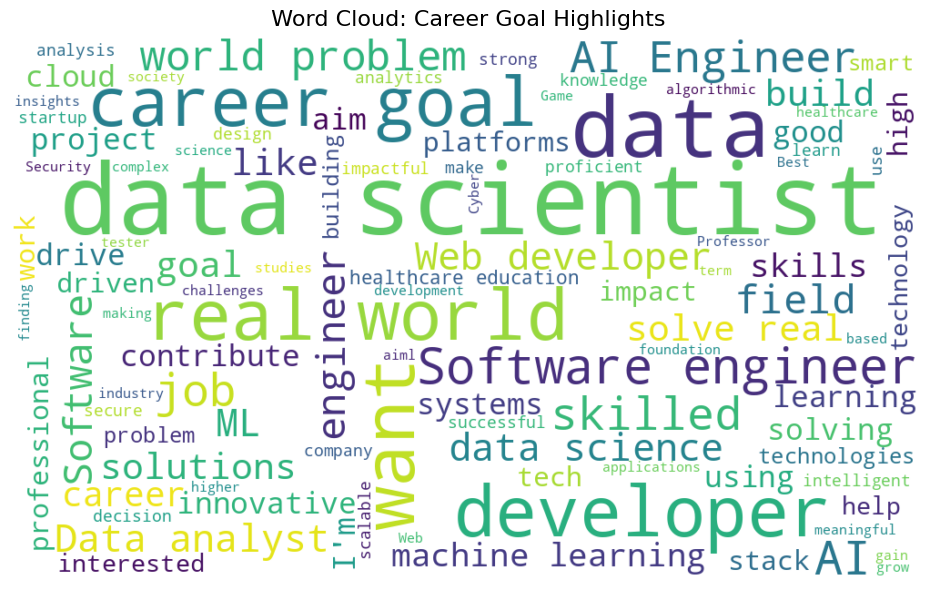

In [ ]:
from wordcloud import WordCloud

# Combine all text from the "career_goal" column
text_data = " ".join(new["What is your career goal?"].astype(str).tolist())

# Create and configure the word cloud
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      stopwords=tfidf.get_stop_words(),
                      colormap='viridis',
                      max_words=100).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" Word Cloud: Career Goal Highlights", fontsize=16)
plt.tight_layout()
plt.show()


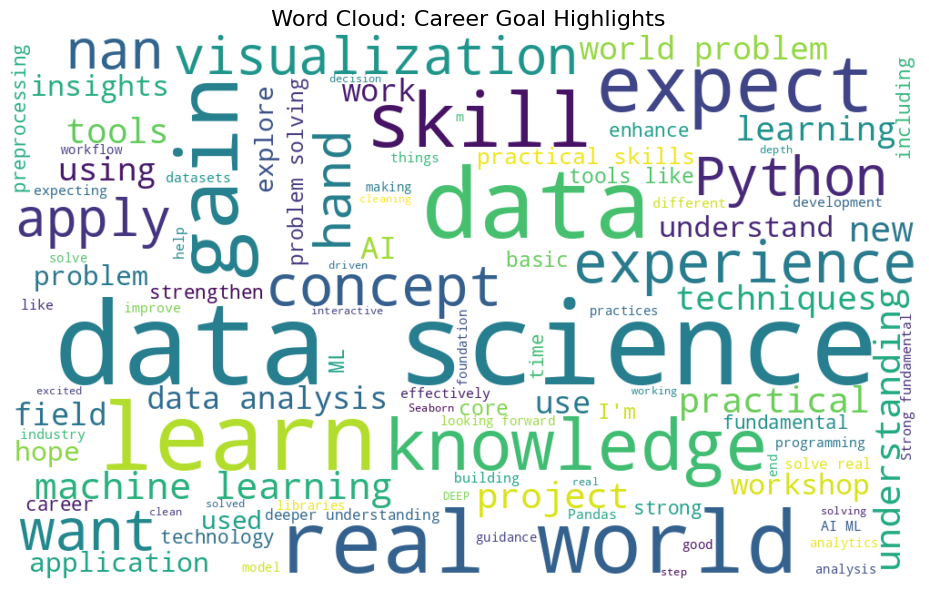

In [ ]:
from wordcloud import WordCloud

# Combine all text from the "expected_learning" column
text_data = " ".join(new["What do you expect to learn from this workshop?"].astype(str).tolist())

# Create and configure the word cloud
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      stopwords=tfidf.get_stop_words(),
                      colormap='viridis',
                      max_words=100).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" Word Cloud: Career Goal Highlights", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# View column names
print(new.columns.tolist())

['Timestamp', 'Name of your College ', 'Age in years (please enter only a number/integer)', 'Which district is your hometown located in?', 'PINCODE of your home address', 'Approx. Distance of your home from IIT Bhilai (in Kms). Enter only a number (floating point).', 'Approx. Time to reach IIT Bhilai from your hometown (in hours). Enter only a number (floating point) ', 'Did you appear in JEE?', 'How comfortable are you with math of data science fundamentals: Linear algebra, Optimization, Statistics, Probability?', 'How comfortable are you with coding in Python?', 'What is your career goal?', 'What do you expect to learn from this workshop?', 'What applications of data science are you most interested in? Give examples from your daily life, or things that impact you most...or where you can make an impact.']
